In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import sys 
import os
import networkx as nx
from collections import Counter, defaultdict
import EoN
import tqdm

# define path to the project for convenoent relative import
sys.path.append(os.path.dirname(os.getcwd())) 
from source.model_output import SEIRModelOutput, SEIRParams
from source.SEIR_network import SEIRNetworkModel


In [2]:
tmax = 150 # time in days for simulation
columns = ['beta', 'gamma', 'delta', 'init_inf_frac', 'init_rec_frac']+ \
    [day_index for day_index in range(tmax)]
dataset = pd.DataFrame(columns=columns)

In [ ]:
network_model = SEIRNetworkModel(10**5)
delta = 0.1
init_inf_frac = 0.005
gamma = 0.1

init_rec_frac_arr = np.arange(0, 0.3, 0.05)
beta_arr = np.arange(0.1, 1.5, 0.05)
for beta in tqdm.tqdm(beta_arr):
    for init_rec_frac in init_rec_frac_arr:
        res = network_model.simulate(beta=beta, gamma=gamma, 
                                 delta=delta, init_inf_frac=init_inf_frac, 
                                 init_rec_frac=init_rec_frac)
        sample = [beta, gamma, delta, init_inf_frac, init_rec_frac] + res.daily_incidence
        dataset.loc[len(dataset)] = sample

100%|██████████| 26/26 [12:46<00:00, 29.47s/it]


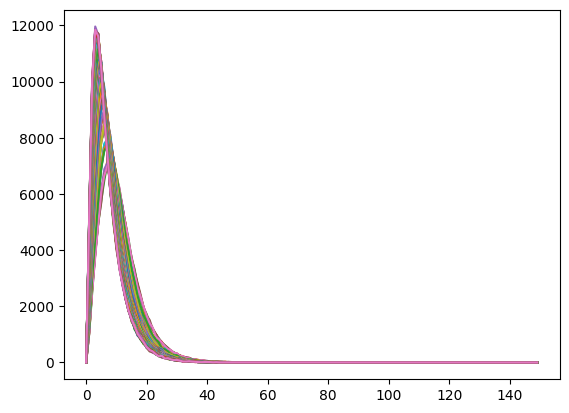

In [30]:
for i in range(157):
    plt.plot(dataset.values[i][5:])